In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
size = np.random.randint(1000, 4000, 200)
bedrooms = np.random.randint(1, 6, 200)
age = np.random.randint(1, 50, 200)
location_score = np.random.randint(1, 11, 200)
price = (size * 0.3) + (bedrooms * 5000) + (age * 2000) + (location_score * 10000) + np.random.normal(0, 20000, 200)

data = pd.DataFrame({'Size (sq ft)': size, 'Bedrooms': bedrooms, 'Age (years)': age, 'Location Score': location_score, 'Price ($1000s)': price})


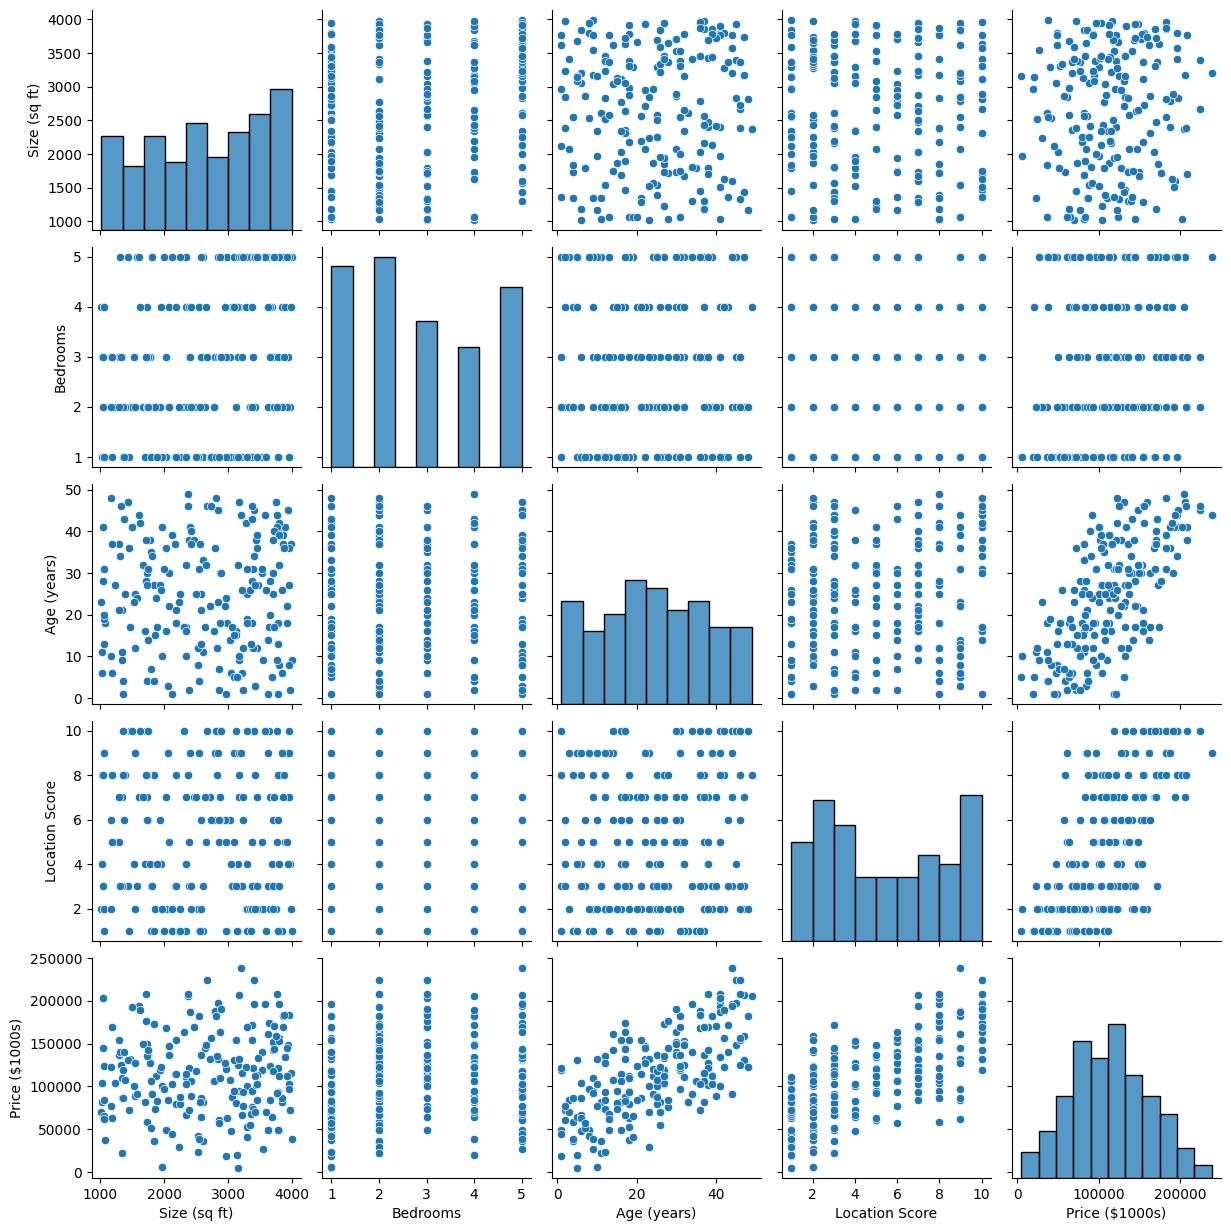

In [3]:
sns.pairplot(data)
plt.show()

In [4]:
x = data[['Size (sq ft)', 'Bedrooms', 'Age (years)', 'Location Score']]
y = data['Price ($1000s)']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [6]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(x_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 412887213.91
R² Score: 0.80
Mean Absolute Error: 16200.66


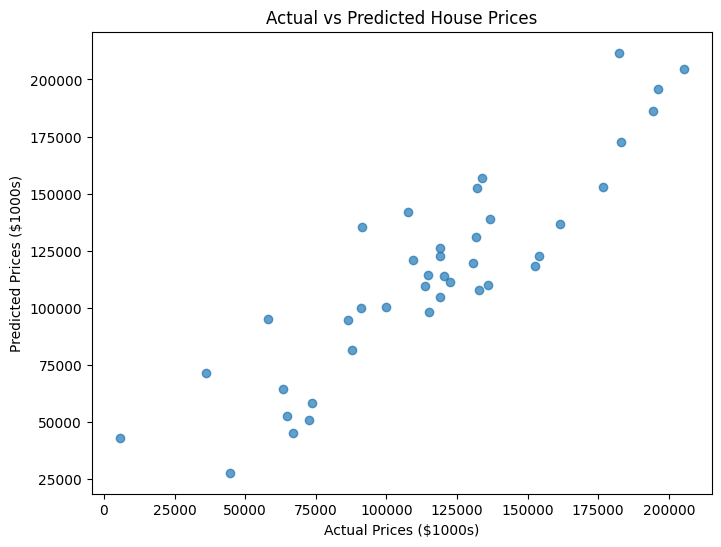

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices ($1000s)")
plt.ylabel("Predicted Prices ($1000s)")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [11]:
new_houses = pd.DataFrame({
    'Size (sq ft)': [1800, 2500, 1200],
    'Bedrooms': [3, 4, 2],
    'Age (years)': [10, 5, 20],
    'Location Score': [8, 9, 6]
})

new_houses_scaled = scaler.transform(new_houses)

predicted_prices = model.predict(new_houses_scaled)

new_houses['Predicted Price($)'] = predicted_prices * 1000

print("\nPredicted Prices for New Houses:\n", new_houses)


Predicted Prices for New Houses:
    Size (sq ft)  Bedrooms  Age (years)  Location Score  Predicted Price($)
0          1800         3           10               8        3.441305e+06
1          2500         4            5               9        8.581762e+06
2          1200         2           20               6       -4.262858e+06


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
